# RSS

In [8]:
import feedparser
from datetime import datetime

DATA_PATH='/home/bkadmin/datasets/spatialedge-hackathon-H1/v1/' 
FROM_DATE='20200101'
TO_DATE='20221231'
SYMBOL = 'EURUSD'
TIMEFRAME = 'H1'

### Search terms

In [19]:
terms = ['Central bank', 'US', 'EU', 'Europe', 'Inflation', 'forex', 'Treasury']
timeranges = ['1d', '1w', '1m', '1m', '1y', '1y', '1y', '1y', '1y']

baseurl = 'https://news.google.com/rss/search?q='
timeurl = '+when%3A'

feeds = []
searchterms = []

for term in terms: 
    searchterms.append(term.replace(' ', '%20'))

for time in timeranges:
    search = "+".join(searchterms)
    feeds.append(baseurl + search + timeurl + time)

print(feeds)

['https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1d', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1w', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1m', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1m', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1y', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1y', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1y', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1y', 'https://news.google.com/rss/search?q=Central%20bank+US+EU+Europe+Inflation+forex+Treasury+when%3A1y']


### Pull feed from google News

In [92]:
mfeeds = ["https://news.google.com/rss/search?q=central+bank+US+EU+site%3Abloomberg.com+when%3A1d&hl=en-ZA&gl=ZA&ceid=ZA%3Aen",
         "https://news.google.com/rss/topics/CAAqJggKIiBDQkFTRWdvSUwyMHZNRGx6TVdZU0FtVnVHZ0pWVXlnQVAB/sections/CAQiSENCQVNNQW9JTDIwdk1EbHpNV1lTQW1WdUdnSlZVeUlQQ0FRYUN3b0pMMjB2TUdkbWNITXpLZ3NTQ1M5dEx6Qm5abkJ6TXlnQSoqCAAqJggKIiBDQkFTRWdvSUwyMHZNRGx6TVdZU0FtVnVHZ0pWVXlnQVABUAE?hl=en-US&gl=US&ceid=US%3Aen",
         "https://news.google.com/rss/search?q=US+EU+United+States+Europe++site%3Abloomberg.com+%22central+bank%22+when%3A1y&hl=en-ZA&gl=ZA&ceid=ZA%3Aen",
         "https://news.google.com/rss/search?q=US+EU+United+States+Europe+site%3Adailymaverick.co.za+%22central+bank%22+when%3A1y&hl=en-ZA&gl=ZA&ceid=ZA%3Aen",
         "https://news.google.com/rss/search?q=US+EU+United+States+Europe+site%3Areuters.com+%22central+bank%22+when%3A1y&hl=en-ZA&gl=ZA&ceid=ZA%3Aen"]

### Exstract Titles and publish dates

In [20]:
titles = []
dates = []

for feed in feeds:
    for post in feedparser.parse(feed).entries:
        title = post.title[::-1]
        title = title.split('-', 1)[1][::-1]
        date = post.published
        titles.append(title) #title.replace(' - Bloomberg', ''))
        dates.append(datetime.strptime(date, '%a, %d %b %Y %X %Z').date())

print('Number of RSS posts :', len(titles))

Number of RSS posts : 590


### Create Dataframe

In [21]:
import pandas as pd

df = pd.DataFrame({'Title': titles, 'Date': pd.to_datetime(dates)}) #df.info()
df.duplicated(keep='first')
df

,Title,Date
0,"Week Kickstarts with Geo-Tensions, Pivots to US Inflation and UK GDP Insights",2023-10-09
1,"Israel-Palestine War Live Updates: Israeli defense minister orders 'complete siege' on Gaza Strip with no electricity, food or fuel",2023-10-09
2,"Bond sell off continues to push yields to highs not seen since GFC, weighing on equities",2023-10-04
3,Quiet session gives traders pause before string of US jobs data throughout rest of week,2023-10-03
4,Man FRM Early View - September 2023 | Man Institute,2023-10-04
...,...,...
585,Mid-year market outlook 2023: Entering uncharted territory,2023-07-11
586,Germany 49-Euro Travel Ticket Set to Hinder Europe's Inflation Retreat,2023-06-22
587,Some ECB Officials Weigh Faster Reduction of Bond Portfolio,2023-06-28
588,BB raises policy rate at sharpest pace in a decade,2023-10-05


## Model

#### Import training dataset

In [11]:
DATASETS = '~/datasets/sentiment_economy_news/'

train = pd.read_parquet(DATASETS + 'train.parquet', engine='pyarrow')
test  = pd.read_parquet(DATASETS + 'test.parquet', engine='pyarrow')

print(train.tail())
print(train.info())

print(test.tail())
print(test.info())

                                                   text    labels  \
2995  'Derogatory' Files Ended Service Of 383 U. S. ...  negative   
2996  Treasury Securities Are Becalmed: Investors Aw...  negative   
2997  SENATE TEST WON BY RIGHTS FORCES: PANEL VOTES ...  negative   
2998  FARMERS PUNISHED IN WETBACK' DRIVE: SOME PERMI...  negative   
2999  EXECUTIVE HIRING EXPECTED TO RISE: STUDY SHOWS...  positive   

          articleid relevance positivity  split positivity_rounded   idx  
2995  nyt_113139986       yes        2.0  train                2.0  2995  
2996  nyt_108972463       yes        4.0  train                4.0  2996  
2997  nyt_119217245       yes        4.0  train                4.0  2997  
2998  nyt_112200942       yes        4.0  train                4.0  2998  
2999  nyt_119481498       yes        6.5  train                6.0  2999  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column              Non-

#### Create a classifier model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

X_train = train['text']
X_test = test['text']

Y_train = pd.Categorical(train['labels'])
Y_test = pd.Categorical(test['labels'])
labels = Y_train.categories

vectorizer = CountVectorizer()

X_train_tokens = vectorizer.fit_transform(train["text"])

transformer = TfidfTransformer()

X_train_tf = transformer.fit_transform(X_train_tokens)

#title_clf = GaussianNB().fit(X_train_tf.toarray(), Y_train)

#title_clf = Pipeline([
#    ('vect', CountVectorizer()),
#    ('tfidf', TfidfTransformer()),
#    ('clf', GaussianNB()),
#])

#### Train model

In [13]:
title_clf = GaussianNB().fit(X_train_tf.toarray(), Y_train)

#### Evaluate Model

In [14]:

from sklearn.metrics import classification_report

X_test_tokens = vectorizer.transform(test['text'])
X_test_tf = transformer.transform(X_test_tokens)

predicted = title_clf.predict(X_test_tf.toarray())

print(classification_report(Y_test, predicted, target_names=labels))

              precision    recall  f1-score   support

    negative       0.62      0.78      0.69       241
    positive       0.34      0.19      0.24       141

    accuracy                           0.56       382
   macro avg       0.48      0.49      0.47       382
weighted avg       0.52      0.56      0.53       382



#### Plot a bar chart on predicted labels for testing data

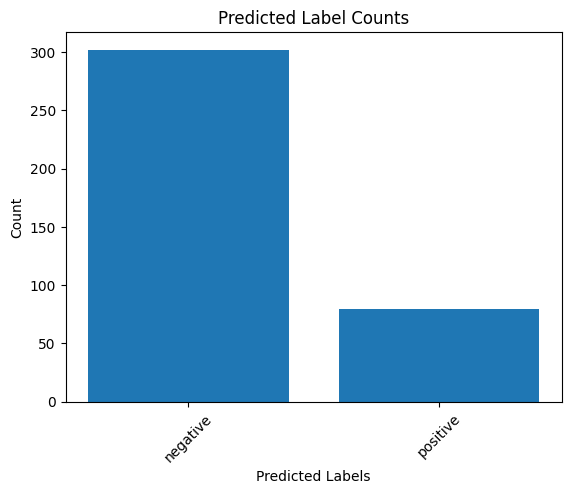

In [15]:
import matplotlib.pyplot as plt 
from collections import Counter

label_counts = Counter(predicted)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Evaluate model on aggregated news sources

In [16]:
X_titles = df['Title']

X_titles_tokens = vectorizer.transform(X_titles)
X_titles_tf = transformer.transform(X_titles_tokens)

Y_predict = title_clf.predict(X_titles_tf.toarray())

df['labels'] = Y_predict

df

,Title,Date,labels
0,"Week Kickstarts with Geo-Tensions, Pivots to U...",2023-10-09,negative
1,Israel-Palestine War Live Updates: Israeli def...,2023-10-09,negative
2,Bond sell off continues to push yields to high...,2023-10-04,positive
3,Quiet session gives traders pause before strin...,2023-10-03,positive
4,Man FRM Early View - September 2023 | Man Inst...,2023-10-04,positive
...,...,...,...
363,Mid-year market outlook 2023: Entering unchart...,2023-07-11,positive
364,Euro zone bond yields fall on concerns about g...,2023-08-18,positive
365,Germany 49-Euro Travel Ticket Set to Hinder Eu...,2023-06-22,positive
366,Some ECB Officials Weigh Faster Reduction of B...,2023-06-28,positive


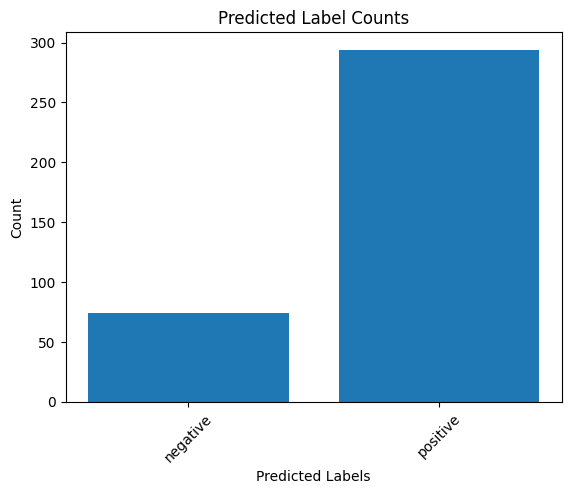

In [17]:
label_counts = Counter(Y_predict)

# Extract labels and counts as separate lists
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Search for some tags & Print final dataframe

In [18]:
if SYMBOL == 'EURUSD':
    search = ['US','U.S.', 'United States', 'North America', 'EU', 'Europe', 'Central Bank', 'Treasuries', 'Treasury', 'Inflation']
else:
    search = []

## Expand for other pairs

tags_in_title = []
for title in titles:
    tags = []
    for tag in search:
        if tag.lower() in title.lower(): tags+=[tag]
    tags_in_title += [tags]

df['Tags'] = tags_in_title

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)
df

,Title,Date,labels,Tags
0,"Week Kickstarts with Geo-Tensions, Pivots to US Inflation and UK GDP Insights",2023-10-09,negative,"[US, Inflation]"
1,"Israel-Palestine War Live Updates: Israeli defense minister orders 'complete siege' on Gaza Strip with no electricity, food or fuel",2023-10-09,negative,[]
2,"Bond sell off continues to push yields to highs not seen since GFC, weighing on equities",2023-10-04,positive,[US]
3,Quiet session gives traders pause before string of US jobs data throughout rest of week,2023-10-03,positive,[US]
4,Man FRM Early View - September 2023 | Man Institute,2023-10-04,positive,[]
5,Mixed trade seen across Europe but positive sentiment overnight due to a breather in US treasuries,2023-10-05,positive,"[US, EU, Europe, Treasuries]"
6,"Israel-Palestine War Live Updates: Israeli defense minister orders 'complete siege' on Gaza Strip with no electricity, food or fuel",2023-10-09,negative,[]
7,Renewable energy sector jobs nearly double over past decade ...,2023-10-05,positive,[]
8,Yen sags to 15-year low vs euro after BOJ rate decision,2023-06-16,positive,[EU]
9,Dollar firms after U.S. labor data suggests more rate hikes,2023-03-02,positive,[U.S.]
